In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import datetime

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
print('train:', df_train.shape)
print('test:', df_test.shape)
X = df_train.iloc[:, 1:785]
y = df_train.iloc[:, 0]
X_test = df_test.iloc[:, 0:784]

train: (42000, 785)
test: (28000, 784)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [6]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_val.shape)
print('y_validation:', y_val.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [7]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_val.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_val.values
x_test_re = df_test.to_numpy().reshape(28000, 28, 28)

In [8]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

(_, W, H) = x_train_re.shape
C = 1
print('image width:', W);
print('image_height:', H);
print('image_channels:', C);

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)
image width: 28
image_height: 28
image_channels: 1


In [9]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


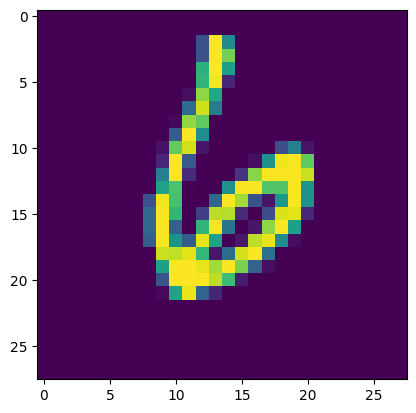

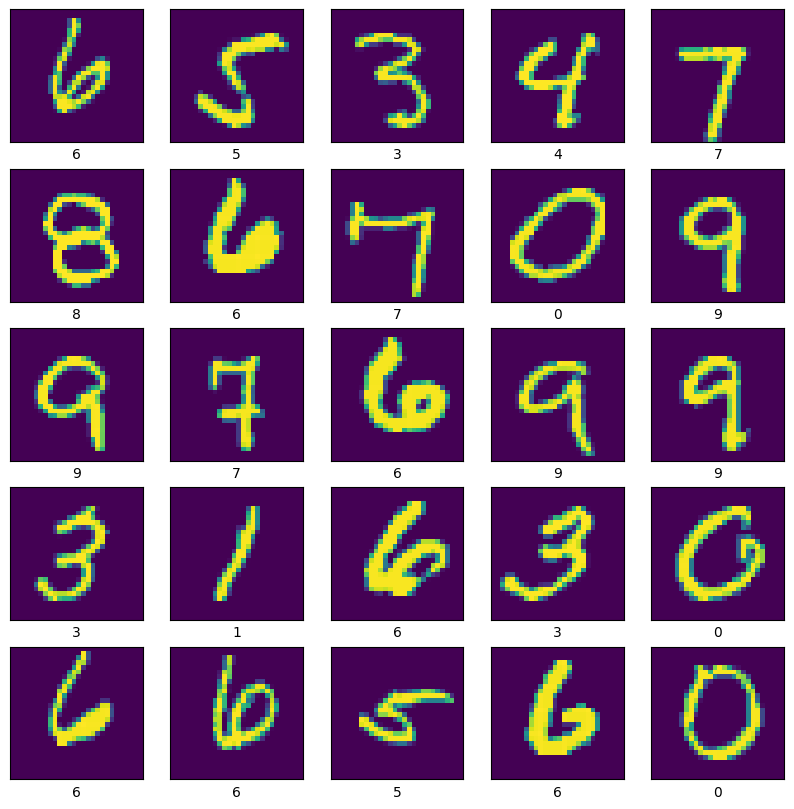

In [10]:
plt.imshow(x_train_re[0])
plt.show()
n = 25
n_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(n_cells, n_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i])
    plt.xlabel(y_train_re[i])
plt.show()

In [11]:
x_train_chanels = x_train_re.reshape(x_train_re.shape[0],W,H,C)

x_validation_chanels = x_validation_re.reshape(x_validation_re.shape[0],W,H,C)

x_test_chanels = x_test_re.reshape(x_test_re.shape[0],W,H,C)

print('x_train_with_chanels:', x_train_chanels.shape)
print('x_validation_with_chanels:', x_validation_chanels.shape)
print('x_test_with_chanels:', x_test_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [12]:
x_train_norm = x_train_chanels / 255
x_validation_norm = x_validation_chanels / 255
x_test_norm = x_test_chanels / 255

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(W, H, C),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [17]:
# tf.keras.utils.plot_model(
#     model,
#     show_shapes=True,
#     show_layer_names=True,
# )

In [18]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [21]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(histogram_freq=1)
training_history = model.fit(
    x_train_norm,
    y_train_re,
    epochs=3,
    validation_data=(x_validation_norm, y_validation_re),
    callbacks=[tensorboard_callback]
)

Epoch 1/3
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0521 - val_accuracy: 0.9831
Epoch 2/3
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 3/3
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0375 - val_accuracy: 0.9898


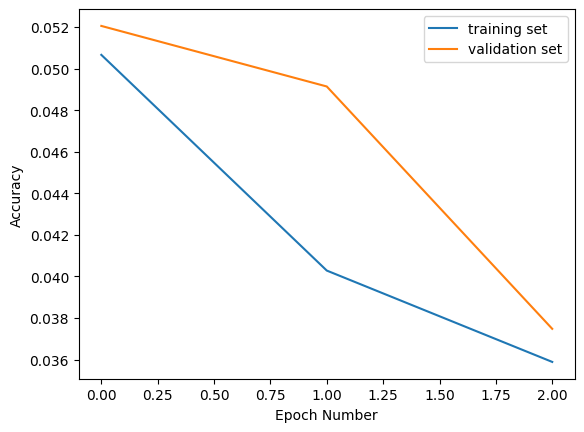

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

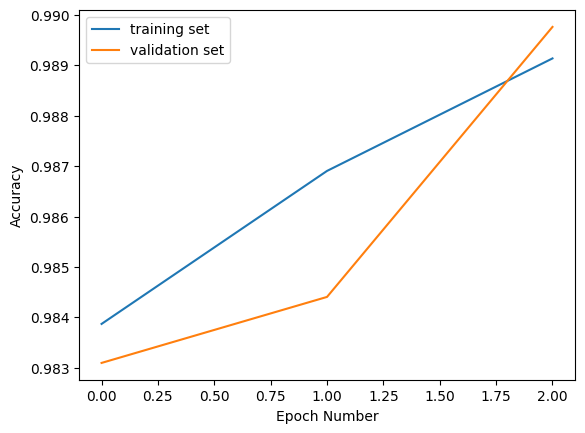

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()


In [24]:
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train_re)
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

1050/1050 [==============================] - 1s 1ms/step - loss: 0.0148 - accuracy: 0.9953
Train loss:  0.01482647005468607
Train accuracy:  0.9952678680419922


In [25]:
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation_re)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

263/263 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9898
Validation loss:  0.03748133033514023
Validation accuracy:  0.9897618889808655


In [27]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

263/263 [==============================] - 1s 2ms/step


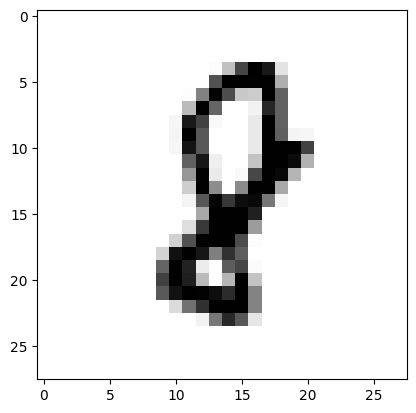

In [28]:
predictions_one_hot = loaded_model.predict([x_validation_norm])

predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

plt.imshow(x_validation_norm[0].reshape((W, H)), cmap=plt.cm.binary)
plt.show()

C:\Users\adiya\AppData\Local\Temp\ipykernel_12192\3998259174.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_cells, n_cells, plot_index + 1)


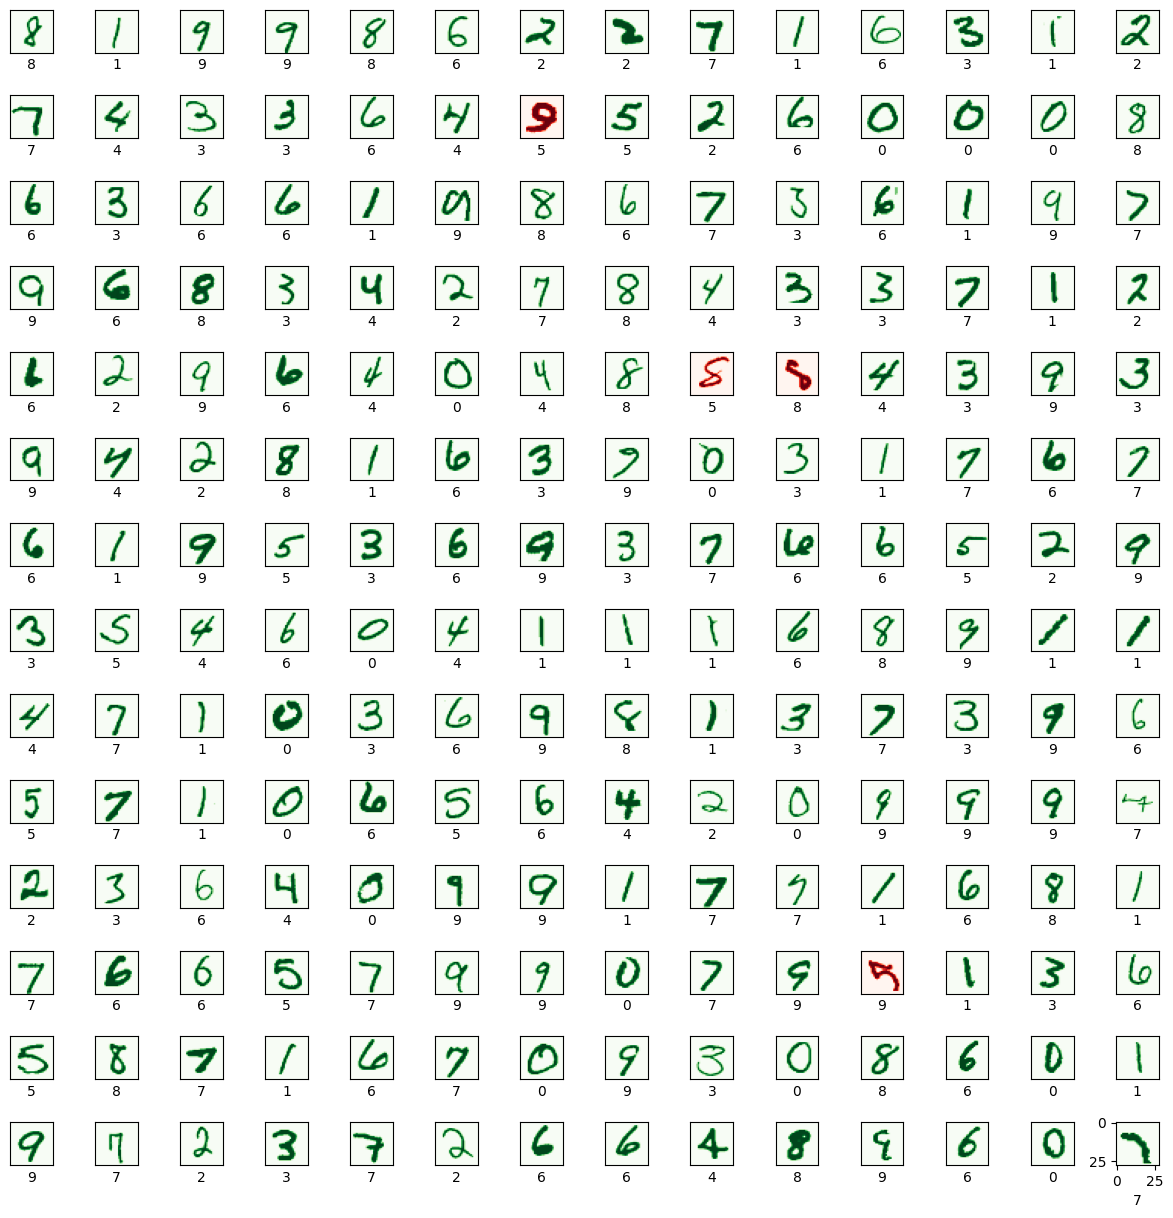

In [31]:
n = 196
n_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(15, 15))
for plot_index in range(n): 
 predicted_label = predictions[plot_index]
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
 plt.subplot(n_cells, n_cells, plot_index + 1)
 plt.imshow(x_validation_norm[plot_index].reshape((H, W)), cmap=color_map)
 plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

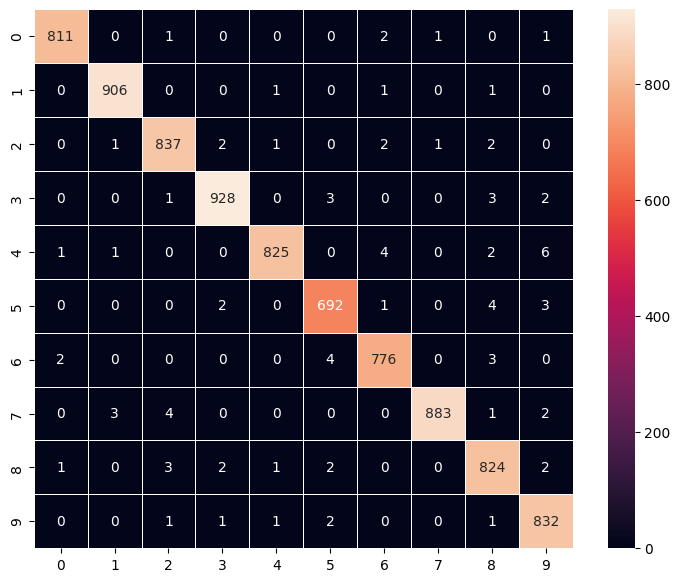

In [32]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [33]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_norm]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1
test_pred.head()

875/875 [==============================] - 1s 1ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [34]:
test_pred

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [35]:
test_pred.to_csv('sub.csv', index_label=False, index = False)